In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

deit_train = pd.read_csv('../../networks/birds_deit/logs_train.csv',sep=';',names=log_names)
levit_train = pd.read_csv('../../networks/birds_levit/logs_train.csv',sep=';',names=log_names)
effnet_train = pd.read_csv('../../networks/birds_effnet/logs_train.csv',sep=';',names=log_names)

deit = pd.read_csv('../../networks/birds_deit/logs_valid.csv',sep=';',names=log_names)
levit = pd.read_csv('../../networks/birds_levit/logs_valid.csv',sep=';',names=log_names)
effnet = pd.read_csv('../../networks/birds_effnet/logs_valid.csv',sep=';',names=log_names)

deit_npt = pd.read_csv('../../networks/birds_deit_npt/logs_valid.csv',sep=';',names=log_names)
deit_npt_train = pd.read_csv('../../networks/birds_deit_npt/logs_train.csv',sep=';',names=log_names)


In [3]:
def plot_by_epoch(col):
    plt.plot(deit['epoch'], deit[col])
    plt.plot(levit['epoch'].iloc[:10], levit[col].iloc[:10])
    plt.plot(effnet['epoch'], effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = deit['seconds'][0] if offset else 0
    deit_x = deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = levit['seconds'][0]  if offset else 0
    levit_x = levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = effnet['seconds'][0] if offset else 0
    effnet_x = effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,deit[col])
    plt.plot(levit_x ,levit[col])
    plt.plot(effnet_x ,effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

# Training

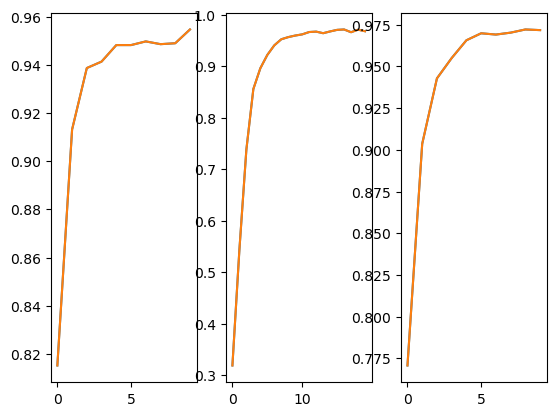

In [4]:
fig, axs = plt.subplots(1,3)
axs[0].plot(deit_train['epoch'], deit['top-1 Acc'])
axs[0].plot(deit['epoch'], deit['top-1 Acc'])

axs[1].plot(levit_train['epoch'], levit['top-1 Acc'])
axs[1].plot(levit['epoch'], levit['top-1 Acc'])

axs[2].plot(effnet_train['epoch'], effnet['top-1 Acc'])
axs[2].plot(effnet['epoch'], effnet['top-1 Acc'])

#axs[3].plot(deit_npt_train['epoch'], deit_npt_train['top-1 Acc'])
#axs[3].plot(deit_npt['epoch'], deit_npt['top-1 Acc'])

# Comparison on Validation Set

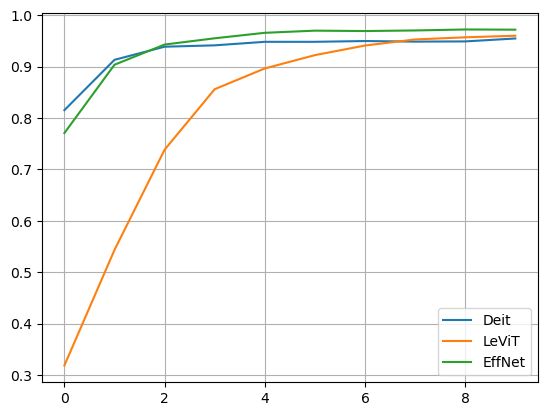

In [5]:
plot_by_epoch('top-1 Acc')

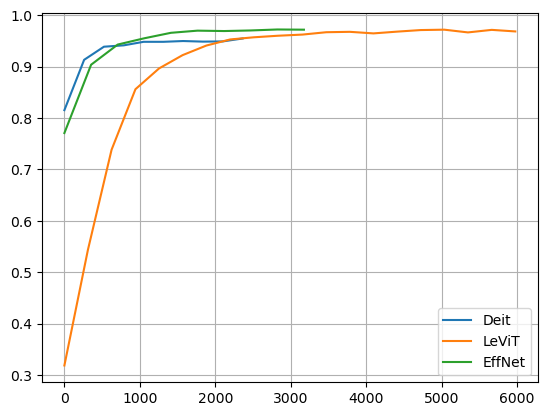

In [6]:
plot_by_time('top-1 Acc',True)

In [7]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{effnet[column].median()}")
    print(f"levit:  \t{levit[column].median()}")
    print(f"deit:   \t{deit[column].median()}")

In [8]:
calculate_median('seconds')

median
effnet: 	353.04362988471985
levit:  	313.7225583791733
deit:   	262.55853366851807


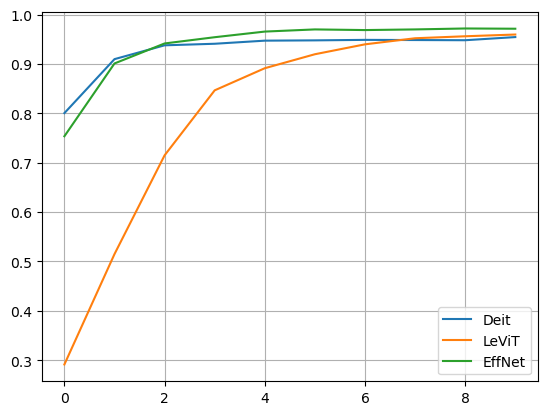

In [9]:
plot_by_epoch('F1-Score')

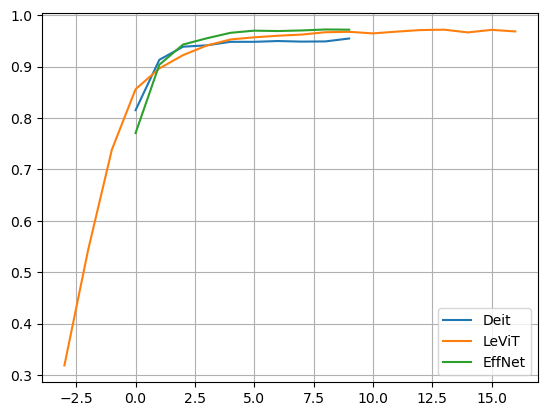

In [10]:
    plt.plot(deit['epoch'],deit["top-1 Acc"])
    plt.plot(levit['epoch']-3,levit["top-1 Acc"])
    plt.plot(effnet['epoch'],effnet["top-1 Acc"])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

In [11]:
# eher mehr epochen trainieren

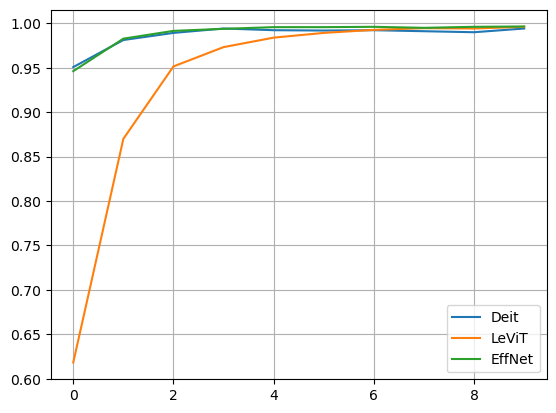

In [12]:
plot_by_epoch('top-5 Acc')

In [13]:
effnet

,epoch,seconds,loss,top-1 Acc,top-5 Acc,F1-Score,Precision,Recall
0,0,356.203651,0.106636,0.770667,0.946286,0.753410,0.805927,0.770667
1,1,354.133453,0.034683,0.903619,0.982857,0.900873,0.923587,0.903619
2,2,352.724440,0.019028,0.942857,0.991619,0.941399,0.953669,0.942857
3,3,351.709933,0.013556,0.955048,0.993905,0.954046,0.962772,0.955047
4,4,353.649808,0.010493,0.965714,0.995809,0.965449,0.972068,0.965714
5,5,352.195262,0.009050,0.969905,0.995809,0.969836,0.975107,0.969905
6,6,353.719844,0.008064,0.969143,0.996190,0.968516,0.974871,0.969143
7,7,351.806234,0.007945,0.970286,0.995048,0.969826,0.975383,0.970286
8,8,353.362820,0.007046,0.972190,0.996190,0.971739,0.976272,0.972190
9,9,351.832212,0.006796,0.971810,0.996571,0.971244,0.976072,0.971809


In [17]:
pd.DataFrame([deit['loss'],deit_npt['loss']])

,0,1,2,3,4,5,6,7,8,9
loss,0.117108,0.040079,0.022439,0.016697,0.013936,0.014509,0.013816,0.013480,0.014606,0.012556
loss,0.341947,0.299167,0.263119,0.233036,0.205812,0.185069,0.165179,0.148723,0.135411,0.124806
